In [113]:
#1:fake news
#0:real news
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,classification_report,mean_absolute_error,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
pd.options.plotting.backend = "plotly"

In [91]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\sai
[nltk_data]     ashrith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
#print(stopwords.words('english'))

In [82]:
news_train=pd.read_csv('train.csv')

In [83]:
news_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [40]:
news_train.shape

(20800, 5)

In [41]:
news_train.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [42]:
 news_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [43]:
news_train=news_train.fillna('')

In [44]:
 news_train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [45]:
news_train['content']= news_train['author']+' '+news_train['title']

In [46]:
X=news_train.drop(columns='label',axis=1)

In [47]:
y=news_train['label']


In [48]:
X

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy Iranian woman jailed for fictio...
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,Michael J. de la Merced and Rachel Abrams Macy...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...","Alex Ansary NATO, Russia To Hold Parallel Exer..."


In [49]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [50]:
ptr=PorterStemmer()



In [51]:
def stemming(content):
    stem_cont = re.sub('[^a-zA-Z]',' ',content)
    stem_cont=stem_cont.lower()
    stem_cont=stem_cont.split()
    stem_cont=[ptr.stem(word) for word in stem_cont if not word in stopwords.words('english')]
    stem_cont=' '.join(stem_cont)
    return stem_cont
    
    

In [52]:
news_train['content']=news_train['content'].apply(stemming)

In [53]:
print(news_train['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [54]:
X=news_train['content'].values

y=news_train['label'].values

print(X)
print(y)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']
[1 0 1 ... 0 1 1]


In [55]:
vect = TfidfVectorizer()

vect.fit(X)


X=vect.transform(X)



In [56]:
print(X)


  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [58]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [59]:
pred=model.predict(X_train)
acc=accuracy_score(pred,y_train)

In [60]:
print('accuracy score of the training data: ',acc)

accuracy score of the training data:  0.9865985576923076


In [61]:
pred=model.predict(X_test)
acc=accuracy_score(pred,y_test)



In [62]:
print('accuracy score for the testing data: ',acc)


accuracy score for the testing data:  0.9790865384615385


In [63]:
print(model.predict(X_test[20]))

[0]


In [64]:
y_test[20]

0

In [72]:
#the model is working well and good !!!!
classsif= classification_report(y_test,pred)

conf=confusion_matrix(y_test,pred)

In [68]:
print(f"The Classification Report {classsif}")

The Classification Report               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



<Axes: >

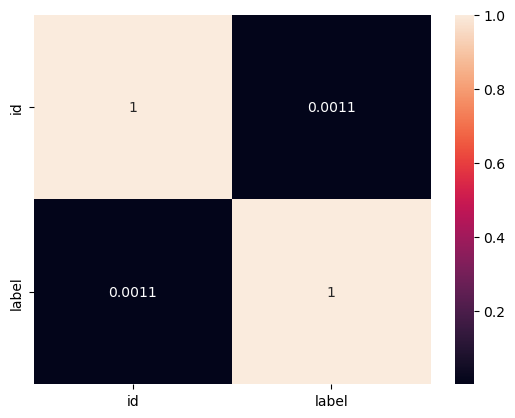

In [71]:
sns.heatmap(news_train.corr(),annot=True)

In [80]:
print("Confusion Matrix ", conf) 

Confusion Matrix  [[2004   73]
 [  14 2069]]


<Axes: >

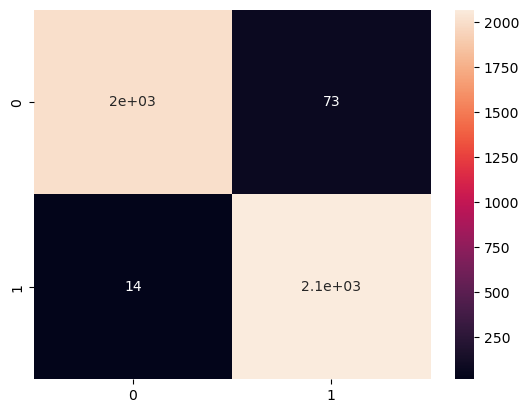

In [75]:
sns.heatmap(conf,annot=True)

<Axes: xlabel='label', ylabel='count'>

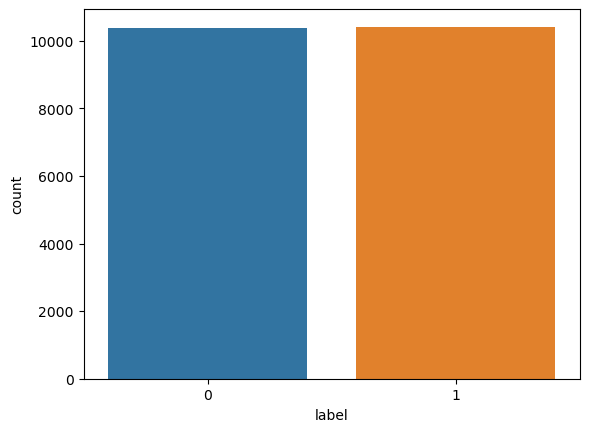

In [85]:
sns.countplot(data = news_train, x= news_train['label'])

In [101]:
at_name= news_train.author.value_counts().index

In [102]:
at_count = news_train.author.value_counts().values

In [103]:
at_count

array([243, 193, 166, ...,   1,   1,   1], dtype=int64)

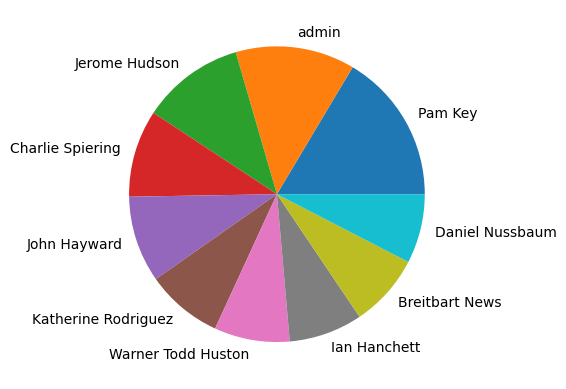

In [115]:
fig=plt.pie(at_count[:10],labels=at_name[:10])